In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/links.csv
/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/links_small.csv
/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/movies_metadata.csv
/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/ratings_small.csv
/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/ratings.csv
/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/keywords.csv
/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/credits.csv


<font color="purple">
K-Nearest Neighbors (KNN) is a classification algorithm. The central idea is that data points with similar attributes tend to fall into similar categories.If you have a dataset of points where the class of each point is known, you can take a new point with an unknown class, find it’s nearest neighbors, and classify it.

## 1. Calculating Distance

<font color="purple">
If we have two features, this means we have 2D data, and we can simply calculate distance between two features by returning the square root of the total of square of the differences of each feature as follows:

In [3]:
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

In [4]:
def distance(movie1, movie2):
    squared_difference = 0
    for i in range(len(movie1)):
        squared_difference += (movie1[i] - movie2[i]) ** 2
    final_distance = squared_difference ** 0.5
    return final_distance

print(distance(star_wars,raiders ))
print(distance(star_wars,mean_girls))

10.770329614269007
38.897300677553446


<font color="purple">
Let’s say this third dimension is the movie’s budget. We now have to find the distance between these two points in three dimensions.

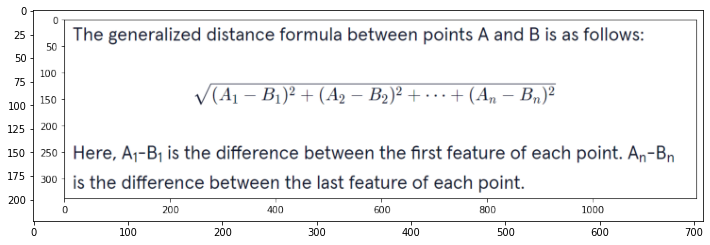

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/Capture.png"))

<font color="purple">
Using this formula above, we can find the K-Nearest Neighbors of a point in N-dimensional space

## 2. Data Normalization

<font color="purple">
Consider the two dimensions of release date and budget. The maximum difference between two movies’ release dates is about 125 years (The Lumière Brothers were making movies in the 1890s). However, the difference between two movies’ budget can be millions of dollars.Another way of thinking about this is that the budget completely outweighs the importance of all other dimensions because it is on such a huge scale. The fact that two movies were 70 years apart is essentially meaningless compared to the difference in millions in the other dimension. Therefore, we need to normalize the data before applying K Nearest Neightbors Algorithm which makes every value be between 0 and 1.

In [7]:
release_dates = [1897, 1998, 2000, 1948, 1962, 1950, 1975, 1960, 2017, 1937, 1968, 1996, 1944, 1891, 1995, 1948, 2011, 1965, 1891, 1978]
def min_max_normalize(lst):
    minimum = min(lst)
    maximum = max(lst)
    normalized = list()
    for i in lst:
        normalized.append((i-minimum)/(maximum-minimum))
    return normalized
print(min_max_normalize(release_dates))

[0.047619047619047616, 0.8492063492063492, 0.8650793650793651, 0.4523809523809524, 0.5634920634920635, 0.46825396825396826, 0.6666666666666666, 0.5476190476190477, 1.0, 0.36507936507936506, 0.6111111111111112, 0.8333333333333334, 0.42063492063492064, 0.0, 0.8253968253968254, 0.4523809523809524, 0.9523809523809523, 0.5873015873015873, 0.0, 0.6904761904761905]


<font color="purple">
By using this function we make all the data be between 0 and 1.

## 3. Finding the Nearest Neighbors

<font color="purple">
In order to find the 5 nearest neighbors, we need to compare this new unclassified movie to every other movie in the dataset. This means we’re going to be using the distance formula again and again. We ultimately want to end up with a sorted list of distances and the movies associated with those distances.

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Multi-modal-movie-genre-prediction-master/data/movies_metadata.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [10]:
def distance(movie1, movie2):
    squared_difference = 0
    for i in range(len(movie1)):
        squared_difference += (movie1[i] - movie2[i]) ** 2
    final_distance = squared_difference ** 0.5
    return final_distance

In [11]:
distance([df.iloc[0]["revenue"],df.iloc[0]["runtime"],df.iloc[0]["vote_average"]],[df.iloc[1]["revenue"],df.iloc[1]["runtime"],df.iloc[0]["vote_average"]])
#This is the distance calculation between the first and second filme in the dataset based on three columns in the dataset

110756784.00000238

In [12]:
def classify(unknown,dataset, k):
    distances = list()
    for row_number, row in dataset.iterrows():
        movie = [row["revenue"],row["runtime"],row["vote_average"]]
        distance_to_point = distance(movie, unknown)
        distances.append([distance_to_point,row["title"]])
    distances.sort()
    neighbors = distances[:k]
    return neighbors
print(classify([373554033, 91, 8],df,5))

[[10.004498987955369, 'Toy Story'], [557674.0011652058, 'What Women Want'], [664640.001806429, 'Batman Begins'], [1319169.0001852834, 'The Golden Compass'], [1613962.0000798316, 'The Adventures of Tintin']]


<font color="purple">
Above we see the 5 nearest neigbors to the example film from the entire dataset based on calculation of three features.We’ve now found the k nearest neighbors, and have stored them in a list that looks like in the list above.

## 4. Classify Movie

<font color="purple">
Our goal now is to count the number of good movies and bad movies in the list of neighbors. If more of the neighbors were good, then the algorithm will classify the unknown movie as good. Otherwise, it will classify it as bad. Lets use popularity column to create a label column that shows 0 or 1 based on their popularity

In [13]:
df.isnull().sum()
df.drop(["belongs_to_collection","homepage","tagline","overview","poster_path","imdb_id","original_language"], axis=1,inplace=True)

In [14]:
df["popularity"].fillna(value=df["popularity"].mode(),inplace=True)
df["popularity"] = pd.to_numeric(df["popularity"],errors ='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   original_title        45466 non-null  object 
 5   popularity            45460 non-null  float64
 6   production_companies  45463 non-null  object 
 7   production_countries  45463 non-null  object 
 8   release_date          45379 non-null  object 
 9   revenue               45460 non-null  float64
 10  runtime               45203 non-null  float64
 11  spoken_languages      45460 non-null  object 
 12  status                45379 non-null  object 
 13  title                 45460 non-null  object 
 14  video                 45460 non-null  object 
 15  vote_average       

In [15]:
def label_encoder(row):
    if row["popularity"] > 2.92:
        return 1
    else:
        return 0

In [16]:
df["label"] = df.apply(lambda row: label_encoder(row), axis=1)
df.head(3)

,adult,budget,genres,id,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,label
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0,1
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0,1
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0,1


In [17]:
def classify(unknown,dataset,labels, k):
    distances = list()
    for row_number, row in dataset.iterrows():
        movie = [row["revenue"],row["runtime"],row["vote_average"]]
        distance_to_point = distance(movie, unknown)
        distances.append([distance_to_point,row["title"],row["label"]])
    distances.sort()
    neighbors = distances[0:k]
    num_good = 0
    num_bad = 0
    for neighbor in neighbors:
        label = neighbor[2]
        if label == 0:
            num_bad += 1
        elif label == 1:
            num_good += 1
    if num_good > num_bad:
        return 1
    else:
        return 0
print(classify([373554033, 91, 8],df,df["label"],5))

1


<font color="purple">
Our classifier is now able to predict whether a movie will be good or bad and returns 1 if it is good or returns 0 if it is bad.

## 5.Using Sklearn Builtin K Neares Neighbors Algorithm

<font color="purple">
We’ve now written your own K-Nearest Neighbor classifier from scratch! However, rather than writing your own classifier every time, you can use Python’s sklearn library. sklearn is a Python library specifically used for Machine Learning

In [18]:
df.drop(["id","genres","spoken_languages","title","original_title","production_companies","production_countries"],axis=1,inplace=True)
df.head(3)

,adult,budget,popularity,release_date,revenue,runtime,status,video,vote_average,vote_count,label
0,False,30000000,21.946943,1995-10-30,373554033.0,81.0,Released,False,7.7,5415.0,1
1,False,65000000,17.015539,1995-12-15,262797249.0,104.0,Released,False,6.9,2413.0,1
2,False,0,11.712900,1995-12-22,0.0,101.0,Released,False,6.5,92.0,1


## 5.1. Data Preprocessing

<font color="purple">
First of all we need to fill or ged tird of missing values for each columns

In [19]:
df.isnull().sum()

adult             0
budget            0
popularity        6
release_date     87
revenue           6
runtime         263
status           87
video             6
vote_average      6
vote_count        6
label             0
dtype: int64

In [20]:

df["release_date"].fillna("2008-01-01",inplace=True)
df["revenue"].fillna(df["revenue"].mean(),inplace=True)
df["runtime"].fillna(df["runtime"].mean(),inplace=True)
df["status"].fillna("Released",inplace=True)
df["video"].fillna("False",inplace=True)
df["popularity"].fillna(df["popularity"].mean(),inplace=True)
df["vote_average"].fillna(df["vote_average"].mean(),inplace=True)
df["vote_count"].fillna(df["vote_count"].mean(),inplace=True)

In [21]:
df.isnull().sum()

adult           0
budget          0
popularity      0
release_date    0
revenue         0
runtime         0
status          0
video           0
vote_average    0
vote_count      0
label           0
dtype: int64

<font color="purple">
Secondly we need to do some feature engineering.

In [22]:
df["release_year"] = df["release_date"].apply(lambda x : int(x[:4]))
df["release_month"] = df["release_date"].apply(lambda x : x[5:7])
df = df[df["release_month"]!= ""]
df["release_month"] = df["release_month"].apply(lambda x : int())
df.drop("release_date",axis=1,inplace=True)
df["budget"] = df["budget"].apply(lambda x: float(x))
df.info()
                                               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adult          45463 non-null  object 
 1   budget         45463 non-null  float64
 2   popularity     45463 non-null  float64
 3   revenue        45463 non-null  float64
 4   runtime        45463 non-null  float64
 5   status         45463 non-null  object 
 6   video          45463 non-null  object 
 7   vote_average   45463 non-null  float64
 8   vote_count     45463 non-null  float64
 9   label          45463 non-null  int64  
 10  release_year   45463 non-null  int64  
 11  release_month  45463 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 4.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

<font color="purple">
The next step is to deal with columns with non numerical values. 

In [23]:
for i in df.select_dtypes("object").columns:
    print(f"Column {i} has these type of data: {df[i].nunique()}")
    print("***************************************************")

Column adult has these type of data: 2
***************************************************
Column status has these type of data: 6
***************************************************
Column video has these type of data: 3
***************************************************


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["adult"] = le.fit_transform(df["adult"])
df_transformed = pd.get_dummies(df, columns=["status","video"])
df_transformed

,adult,budget,popularity,revenue,runtime,vote_average,vote_count,label,release_year,release_month,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored,video_False,video_True,video_False
0,0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,1,1995,0,0,0,0,0,1,0,1,0,0
1,0,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,1,1995,0,0,0,0,0,1,0,1,0,0
2,0,0.0,11.712900,0.0,101.0,6.5,92.0,1,1995,0,0,0,0,0,1,0,1,0,0
3,0,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,1,1995,0,0,0,0,0,1,0,1,0,0
4,0,0.0,8.387519,76578911.0,106.0,5.7,173.0,1,1995,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0.0,0.072051,0.0,90.0,4.0,1.0,0,2008,0,0,0,0,0,1,0,1,0,0
45462,0,0.0,0.178241,0.0,360.0,9.0,3.0,0,2011,0,0,0,0,0,1,0,1,0,0
45463,0,0.0,0.903007,0.0,90.0,3.8,6.0,0,2003,0,0,0,0,0,1,0,1,0,0
45464,0,0.0,0.003503,0.0,87.0,0.0,0.0,0,1917,0,0,0,0,0,1,0,1,0,0


<font color="purple">
Now all the columns are numerical as it is seen below:

In [25]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   adult                   45463 non-null  int64  
 1   budget                  45463 non-null  float64
 2   popularity              45463 non-null  float64
 3   revenue                 45463 non-null  float64
 4   runtime                 45463 non-null  float64
 5   vote_average            45463 non-null  float64
 6   vote_count              45463 non-null  float64
 7   label                   45463 non-null  int64  
 8   release_year            45463 non-null  int64  
 9   release_month           45463 non-null  int64  
 10  status_Canceled         45463 non-null  uint8  
 11  status_In Production    45463 non-null  uint8  
 12  status_Planned          45463 non-null  uint8  
 13  status_Post Production  45463 non-null  uint8  
 14  status_Released         45463 non-null

<font color="purple">
Here we split data into training and test set.

In [26]:
X = df_transformed.drop("label",axis=1)
y = df_transformed["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36370, 18)
(9093, 18)
(36370,)
(9093,)


<font color="purple">
Here we rescale the data before applying the algorithm.

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train) # the algorithm fits with our data
predictions=knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
print(confusion_matrix(y_test,predictions))
print("**********************************")
print(silhouette_score(X_test,y_test))
print("**********************************")
print(classification_report(y_test,predictions))

[[6368   85]
 [ 130 2510]]
**********************************
0.15968159062365228
**********************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6453
           1       0.97      0.95      0.96      2640

    accuracy                           0.98      9093
   macro avg       0.97      0.97      0.97      9093
weighted avg       0.98      0.98      0.98      9093



<font color="purple">
Although k=1 is very good for our predictions, we will check whether there is better k value or not

Text(0, 0.5, 'Error Rate')

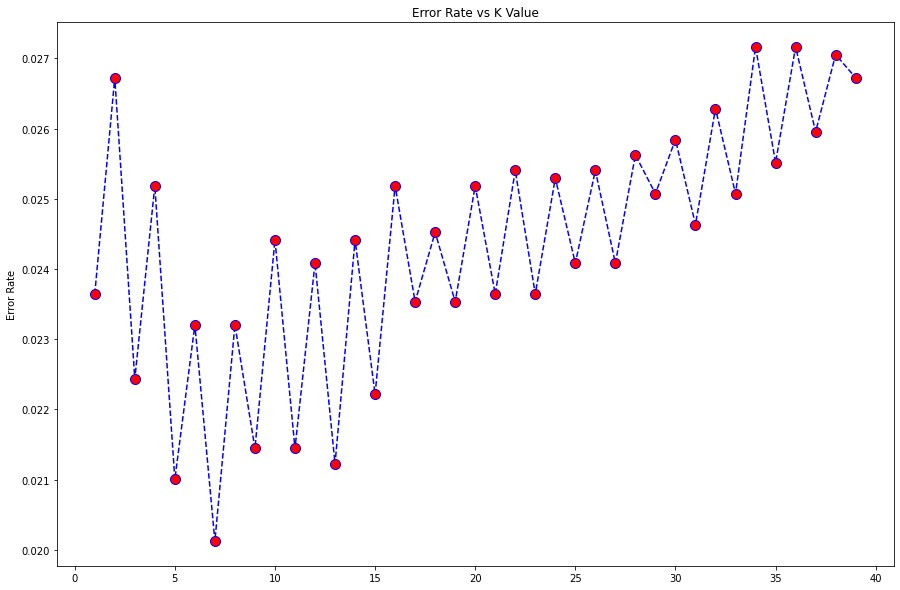

In [30]:
error_rate=list()
#here we iterate meny different k values and plot their error rates 
#and discover which one is better than others and has the lowest error rate
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i=knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
# Now we will plot the prediction error rates of different k values
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")

<font color="purple">
According to figure,  k = 7 value give the lowest error rate. Now we will choose k=7 and evaluate its performance again

In [31]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)
print(confusion_matrix(y_test,predictions))
print("**********************************")
print(silhouette_score(X_test,y_test))
print("**********************************")
print(classification_report(y_test,predictions))

[[6408   45]
 [ 138 2502]]
**********************************
0.15968159062365228
**********************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6453
           1       0.98      0.95      0.96      2640

    accuracy                           0.98      9093
   macro avg       0.98      0.97      0.98      9093
weighted avg       0.98      0.98      0.98      9093



<font color="purple">
Now, with new k value, the algorithm has % 98 accuracy and the confusion matrix results are also better than before